          time       start         end  count  diff
0  4585.718080  2260641909  2260643049  15935  1140
1  4585.734608  2260658687  2260659827  15825  1140
2  4585.746638  2260670654  2260671793  15989  1139
3  4585.758655  2260682454  2260683593  15932  1139
4  4585.770676  2260694512  2260695642  15806  1130


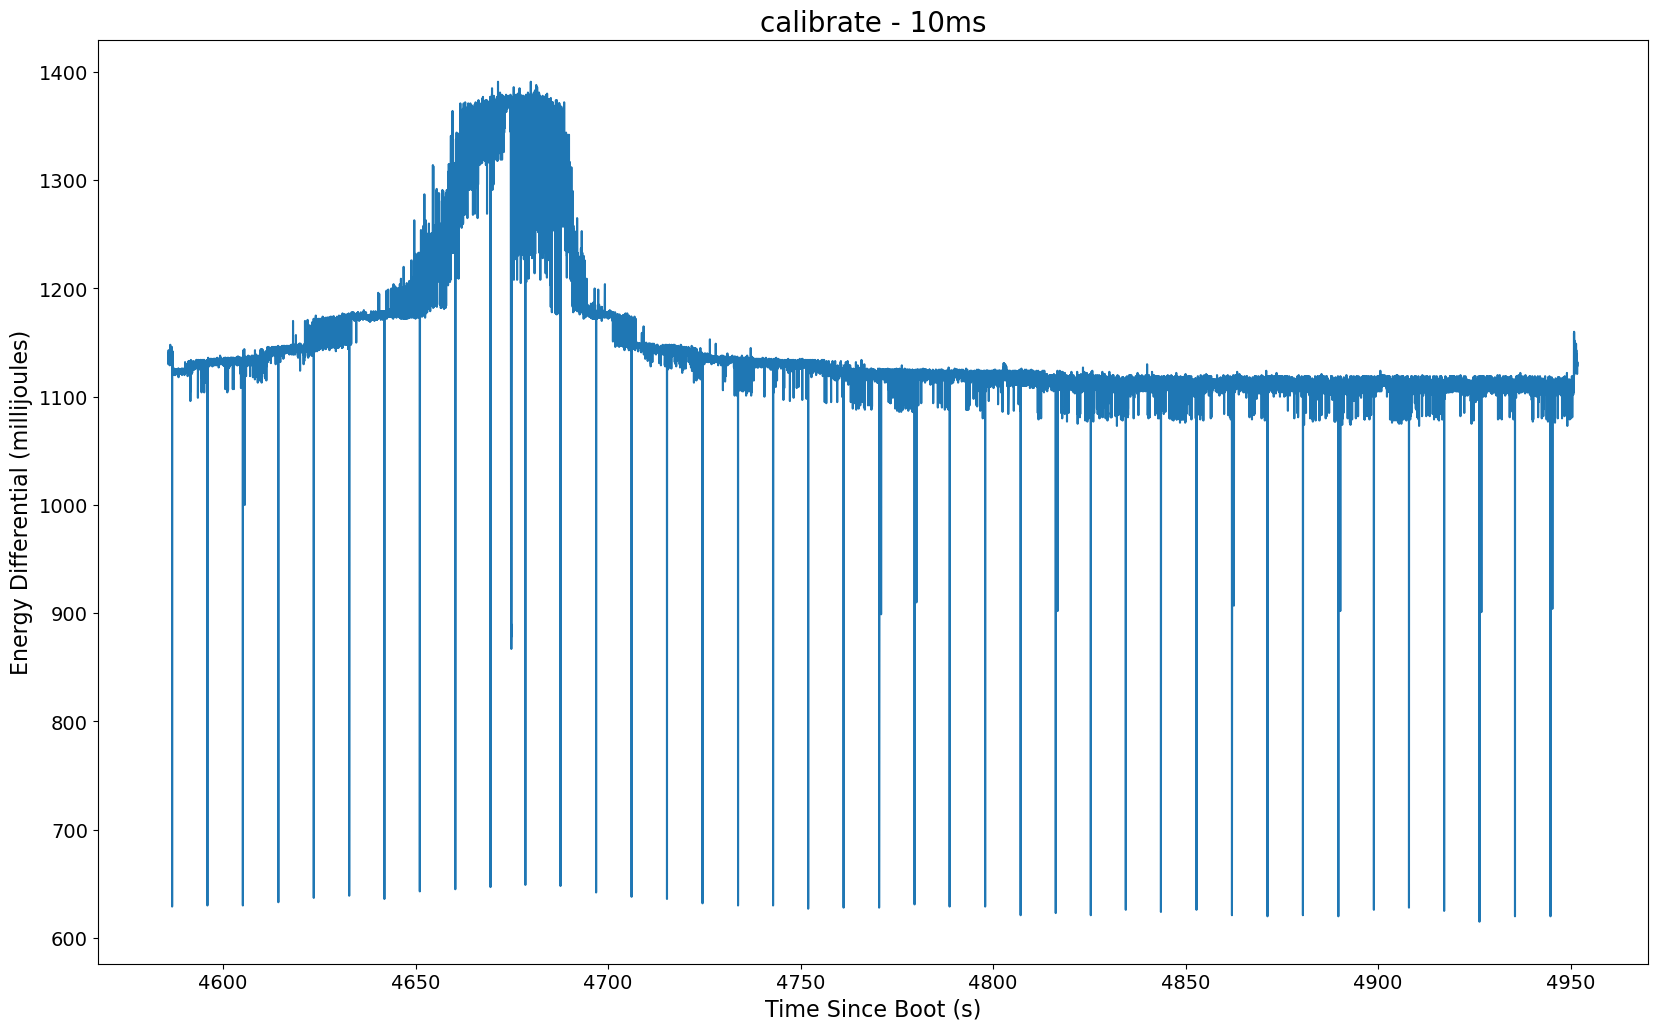

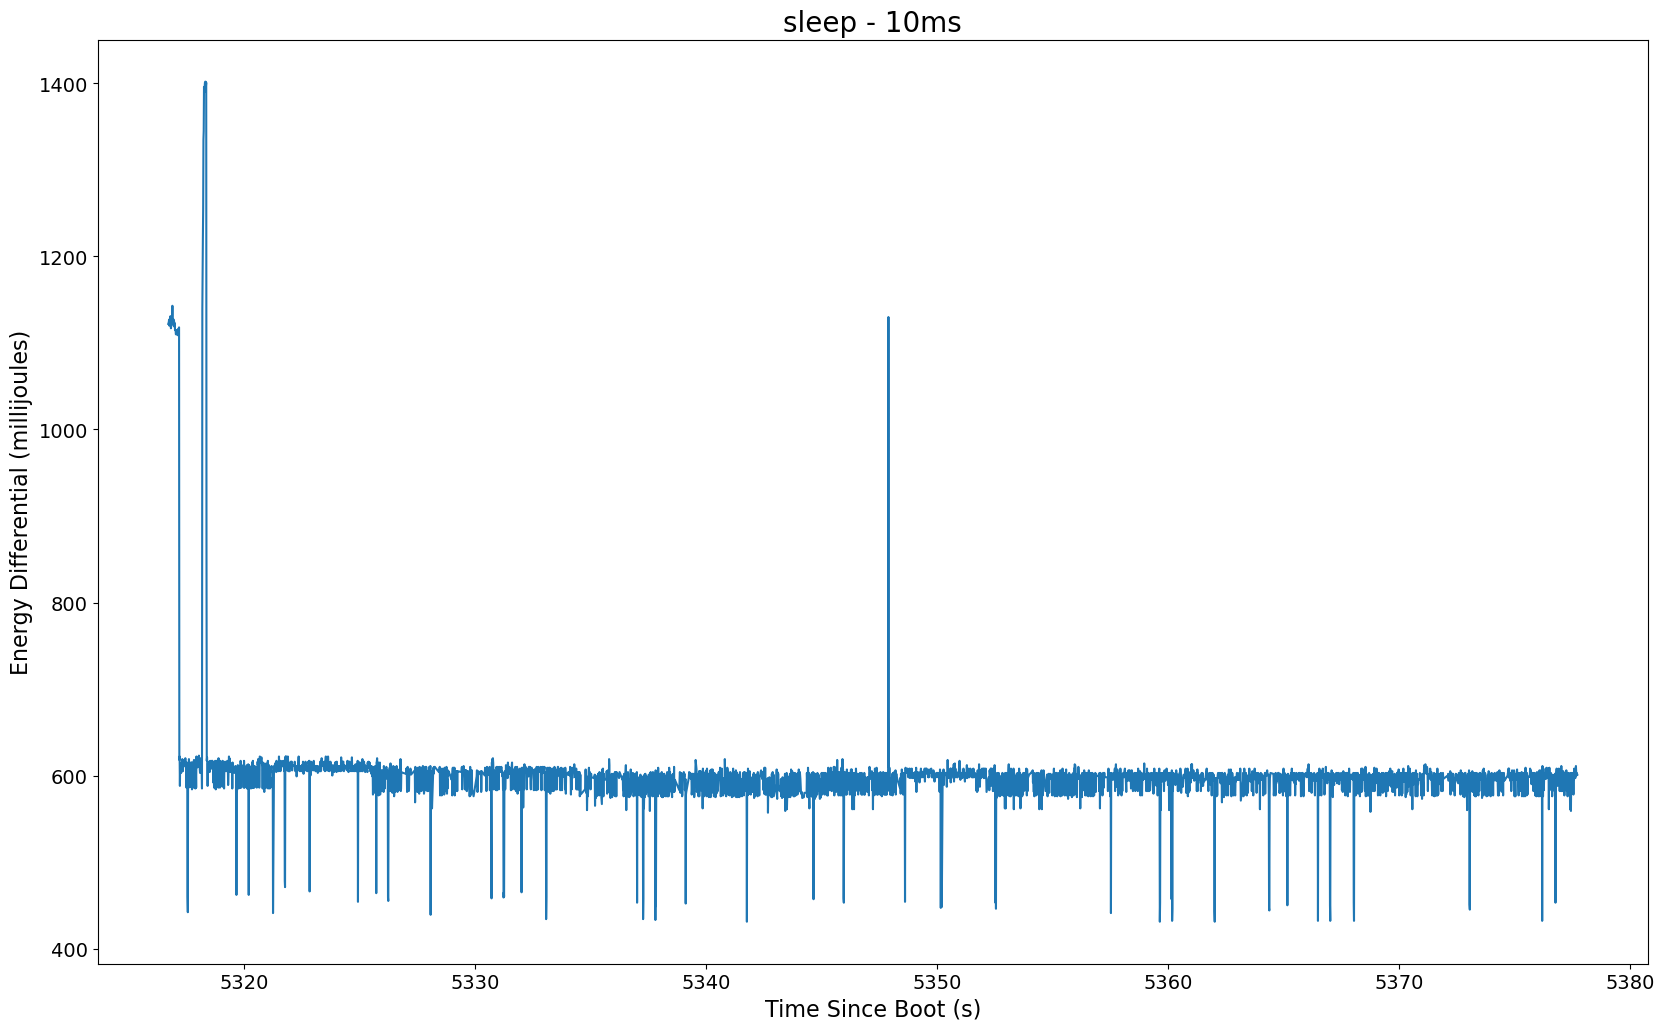

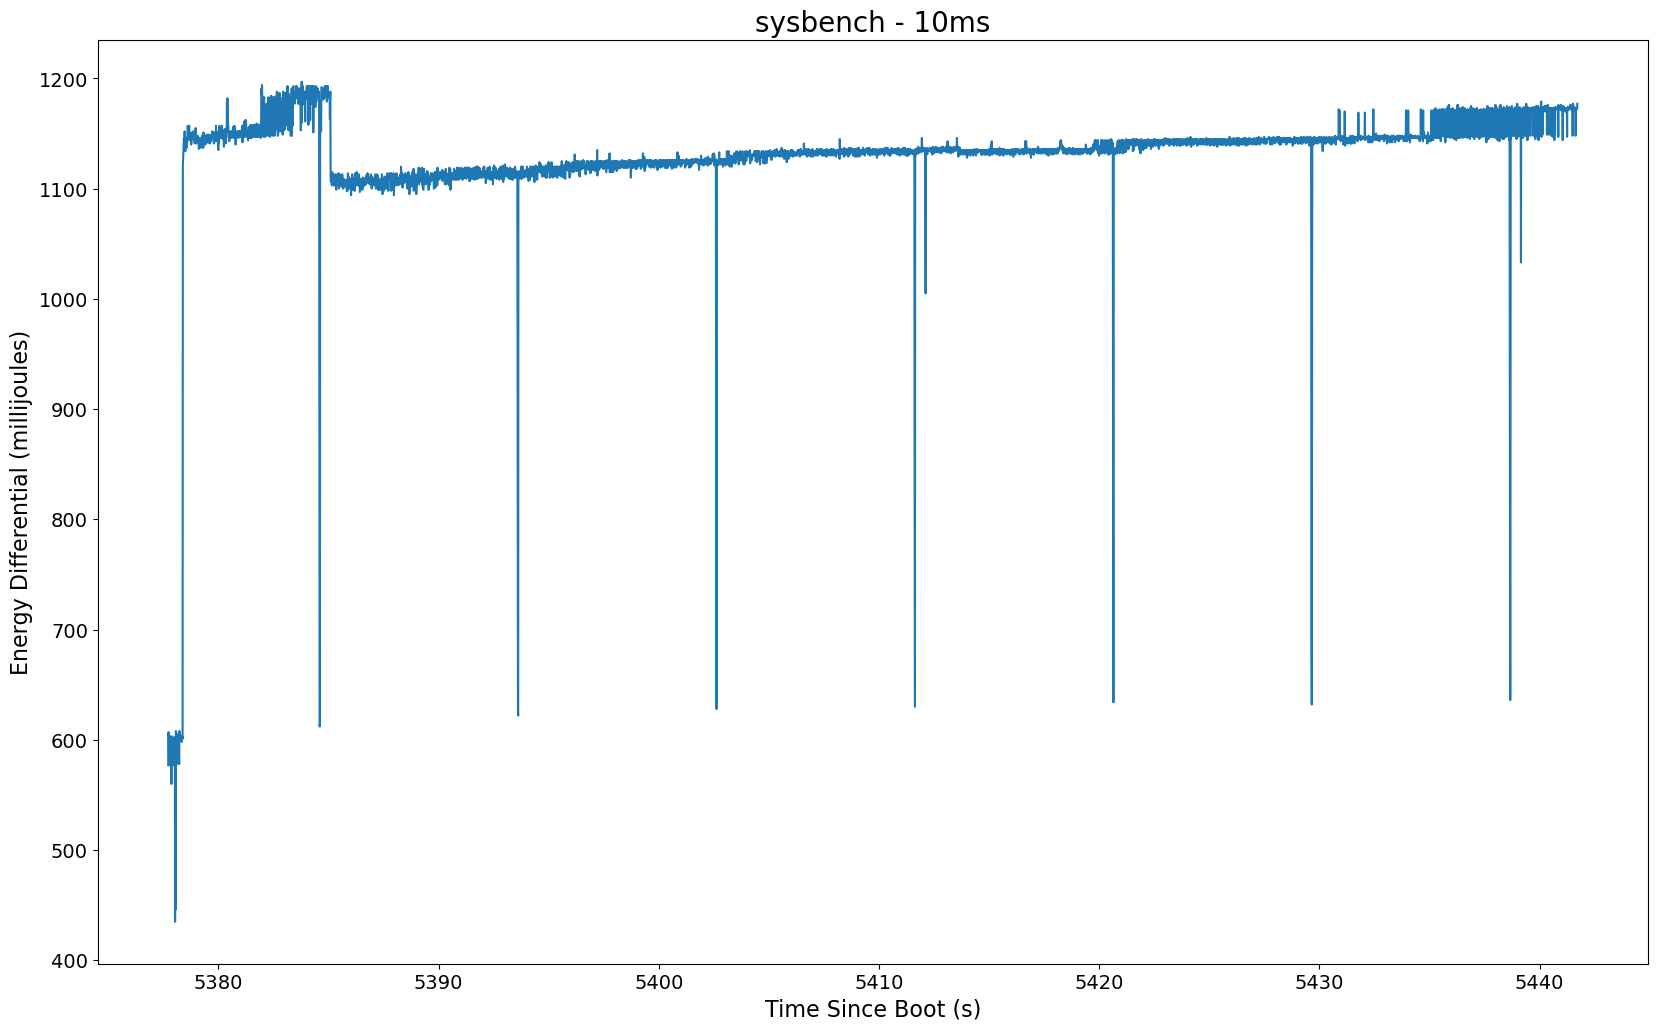

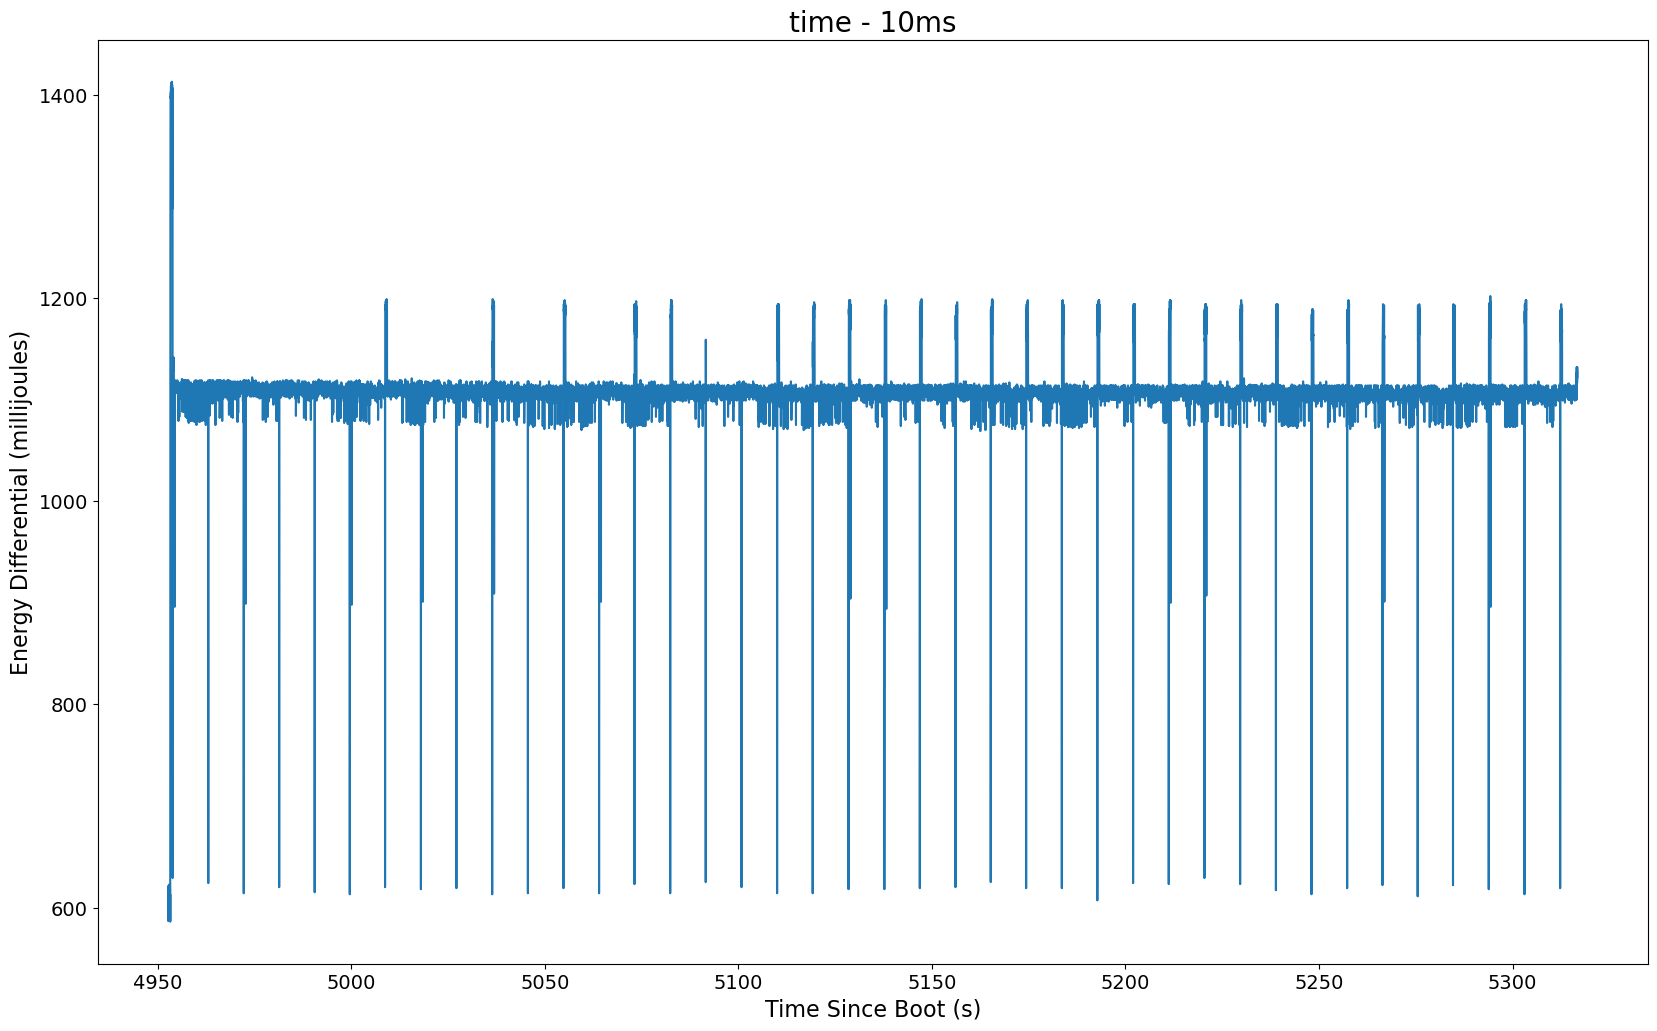

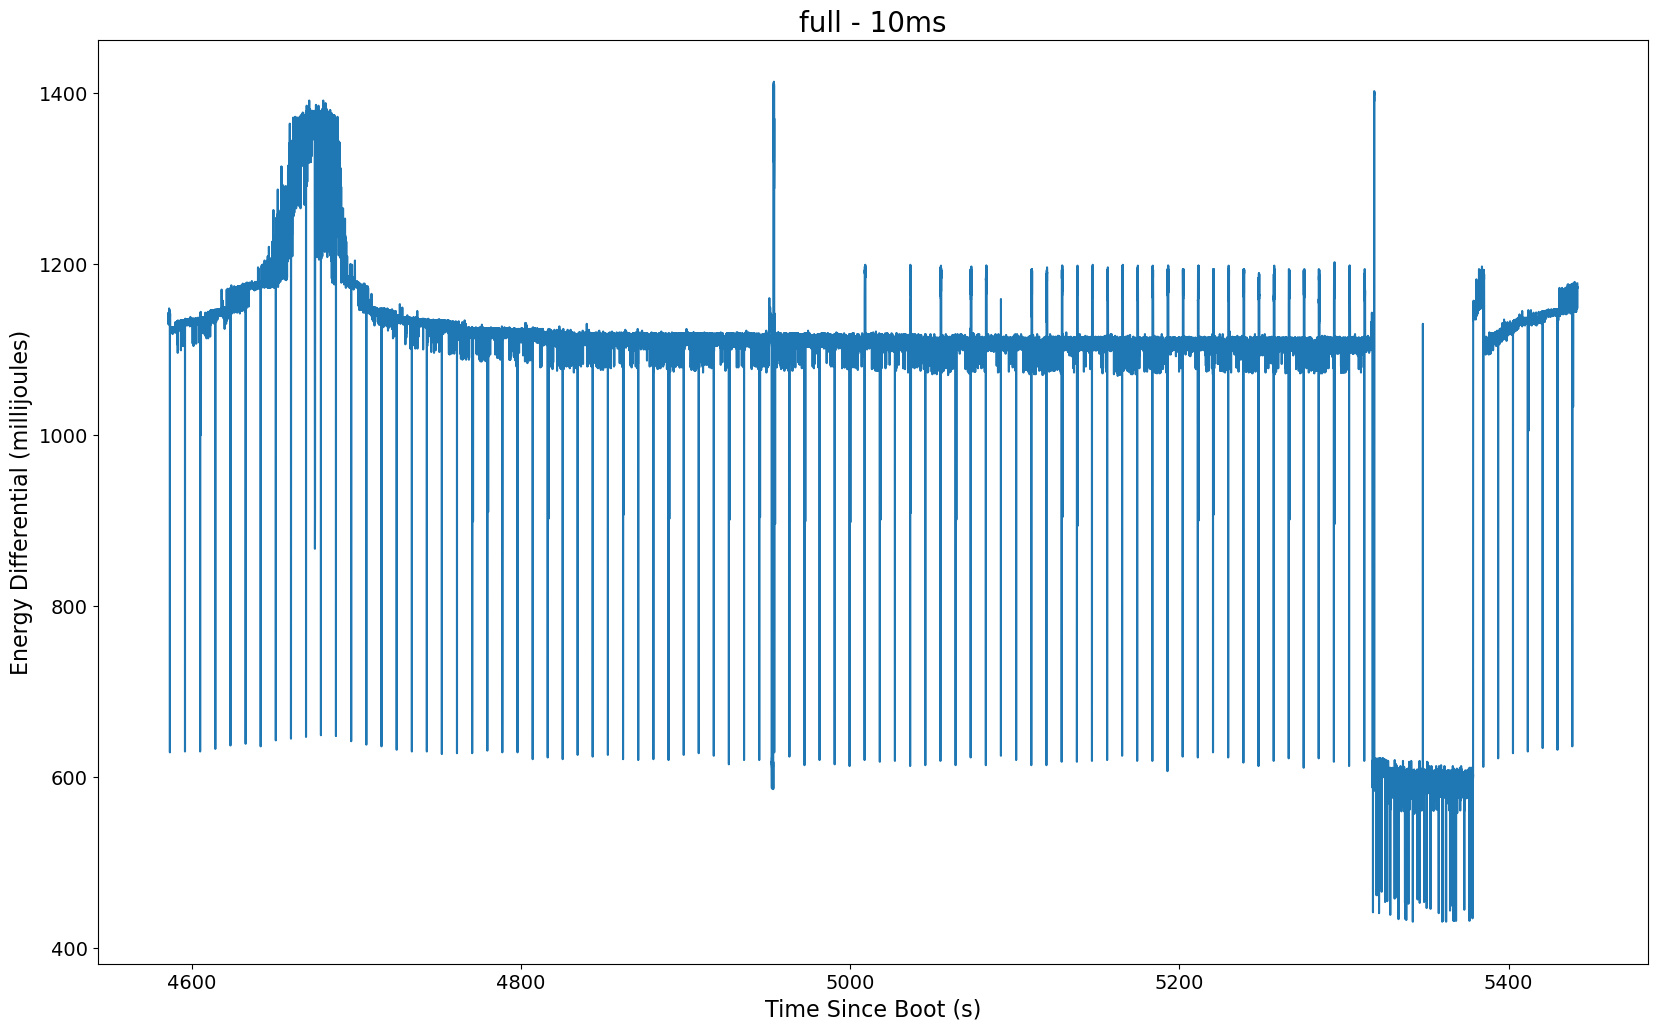

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# Kernel polling timer
POLLING_TIMER = "10ms"

# Data sources to run on. Default: calibrate, time, sleep, sysbench
data_sources = ['calibrate', 'sleep', 'sysbench', 'time', 'full']

# Read files. Their paths are in the format results/<datasource>/dmesg_<datasource>.csv
data = [(source, pd.read_csv(Path('results', POLLING_TIMER, source, f'dmesg_{source}.csv'))) for source in data_sources]

print(data[0][1].head())

for source in data:
    # Plot the data
    source[1].plot(x='time', y='diff', title=f'{source[0]} - 10ms', figsize=(20, 12))
    plt.legend().set_visible(False)

    plt.xlabel('Time Since Boot (s)', fontsize=16)
    plt.ylabel('Energy Differential (millijoules)', fontsize=16)

    # Bigger fonts for the title and axis labels
    plt.title(f'{source[0]} - 10ms', fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # Save the plot to results/<datasource>/dmesg_plot.png
    plt.savefig(Path('results', POLLING_TIMER, source[0], 'dmesg_plot.png'))

    plt.show()

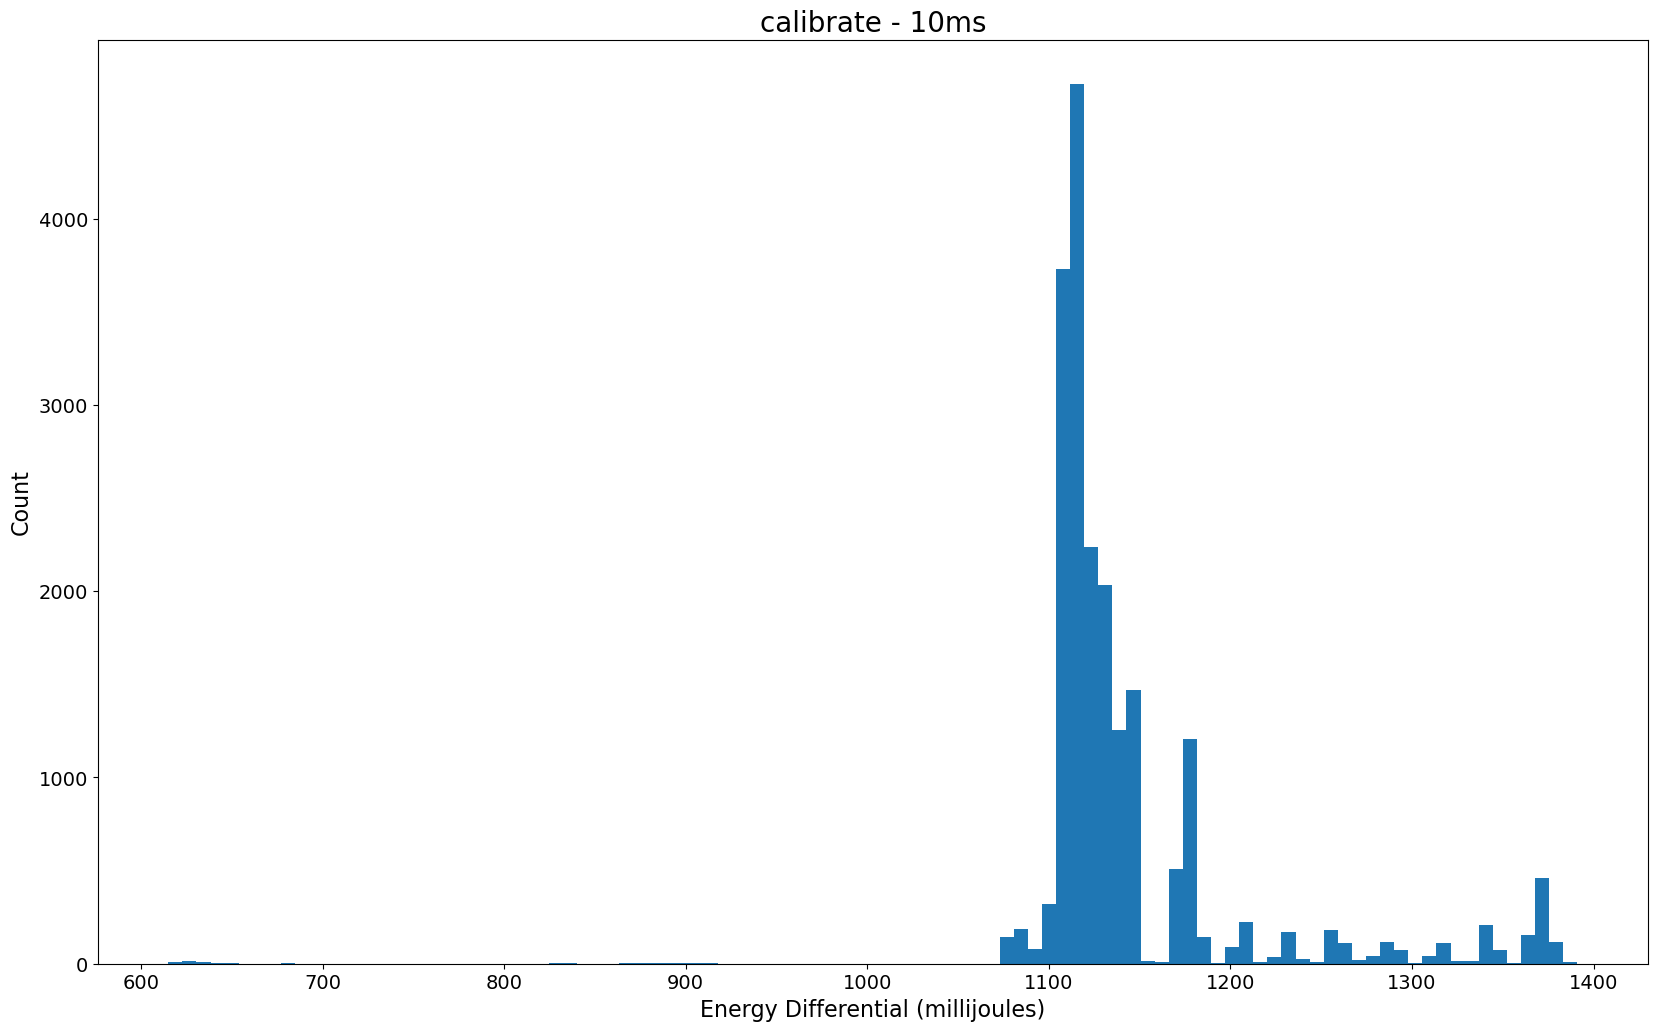

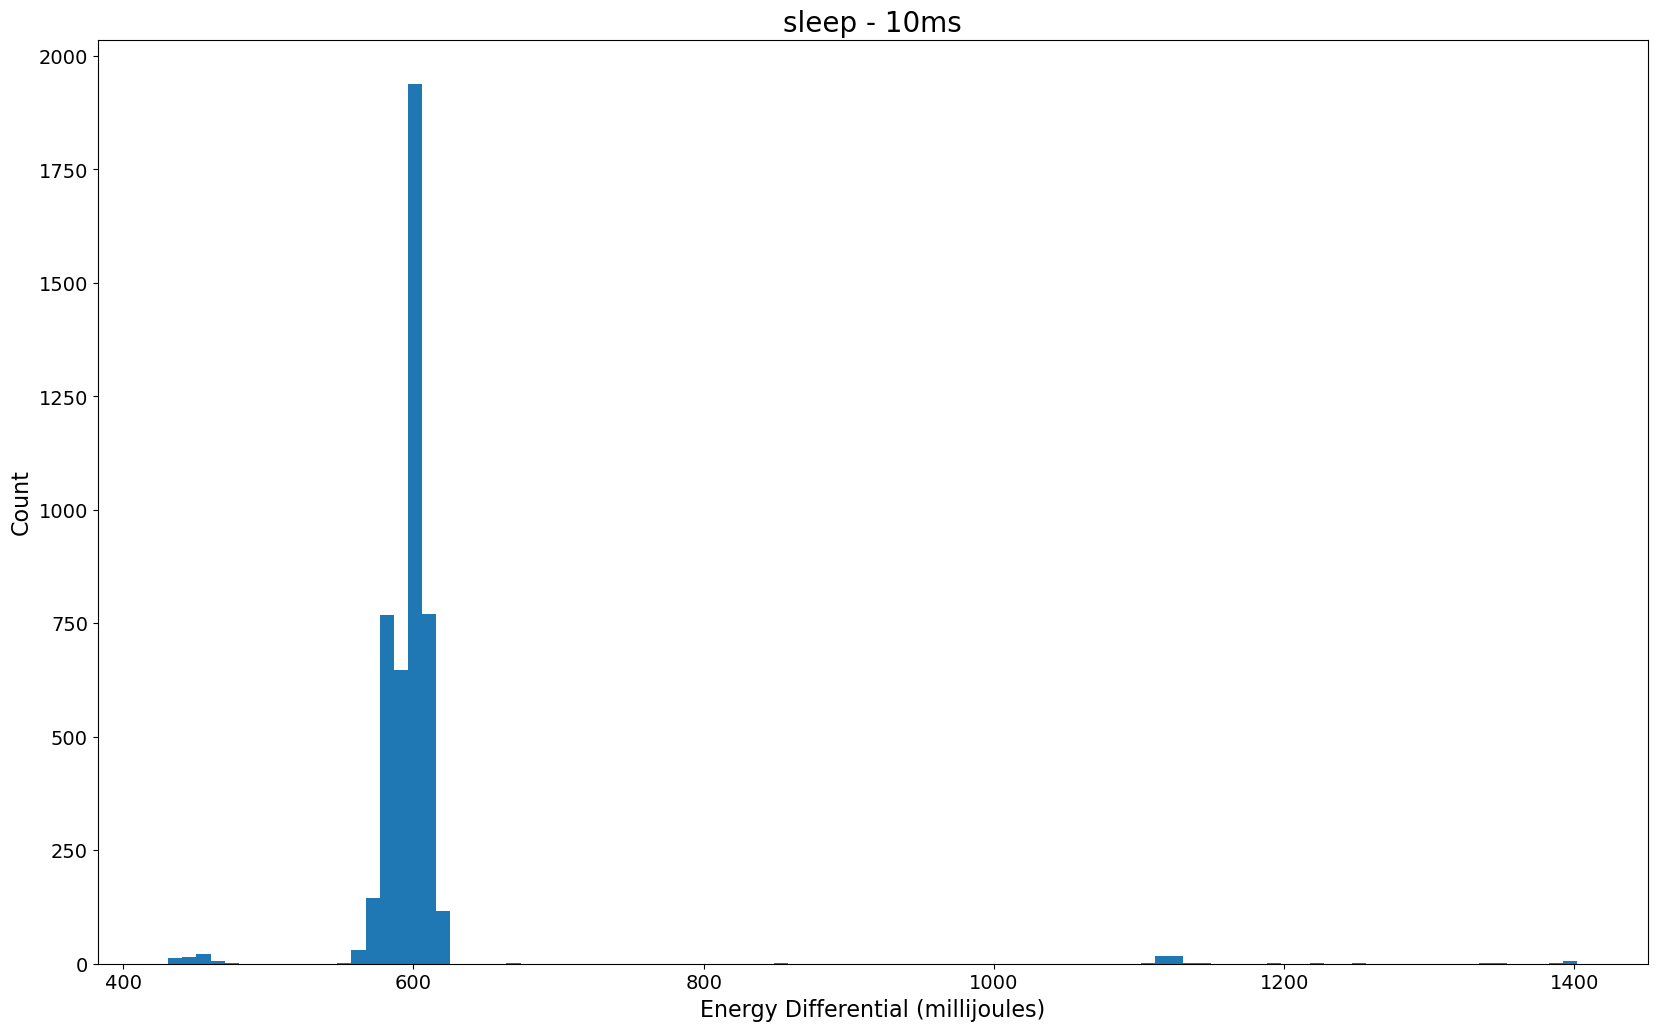

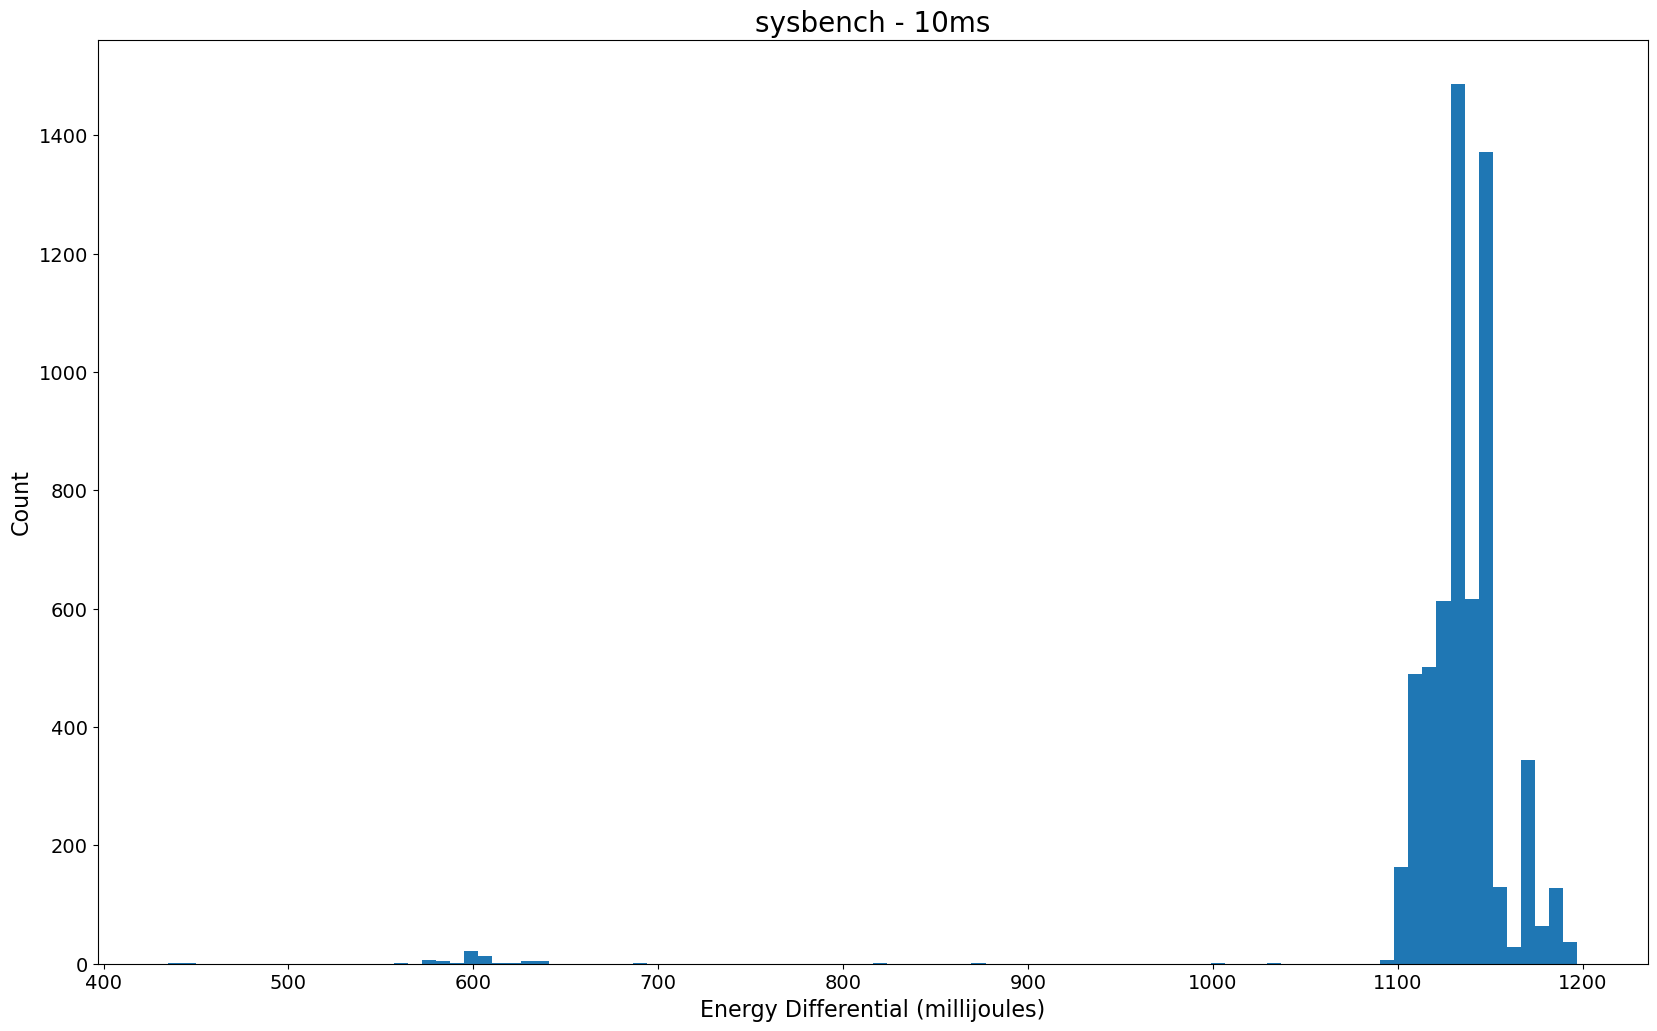

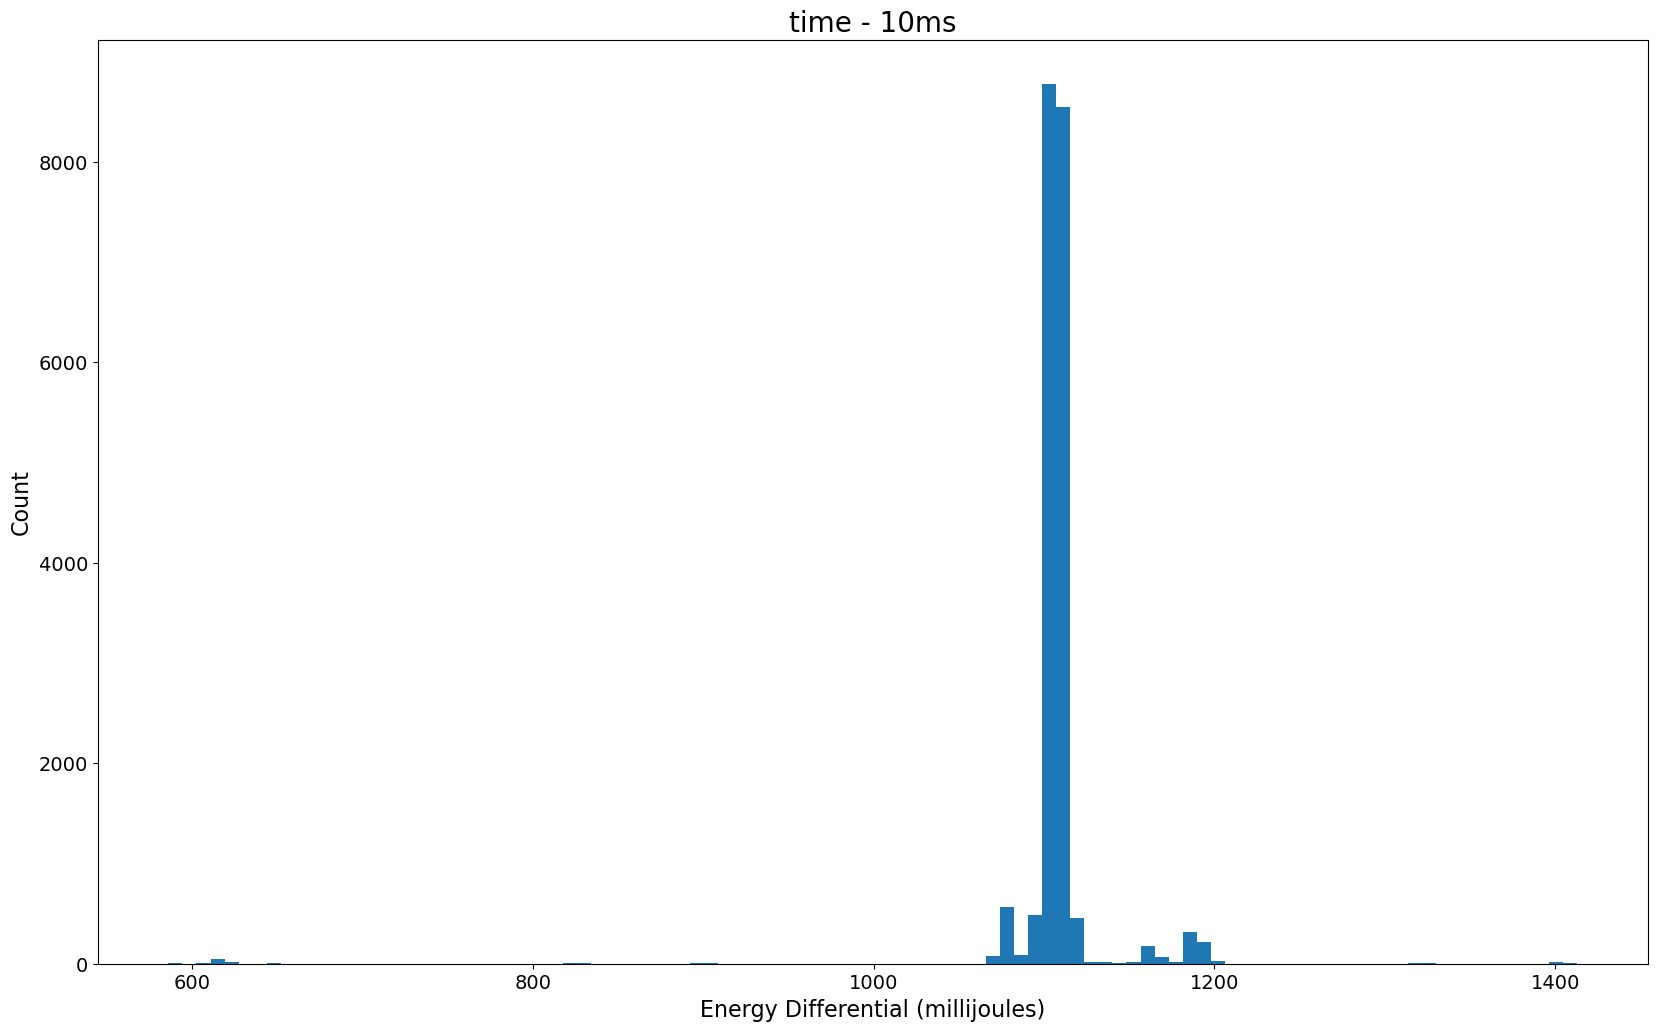

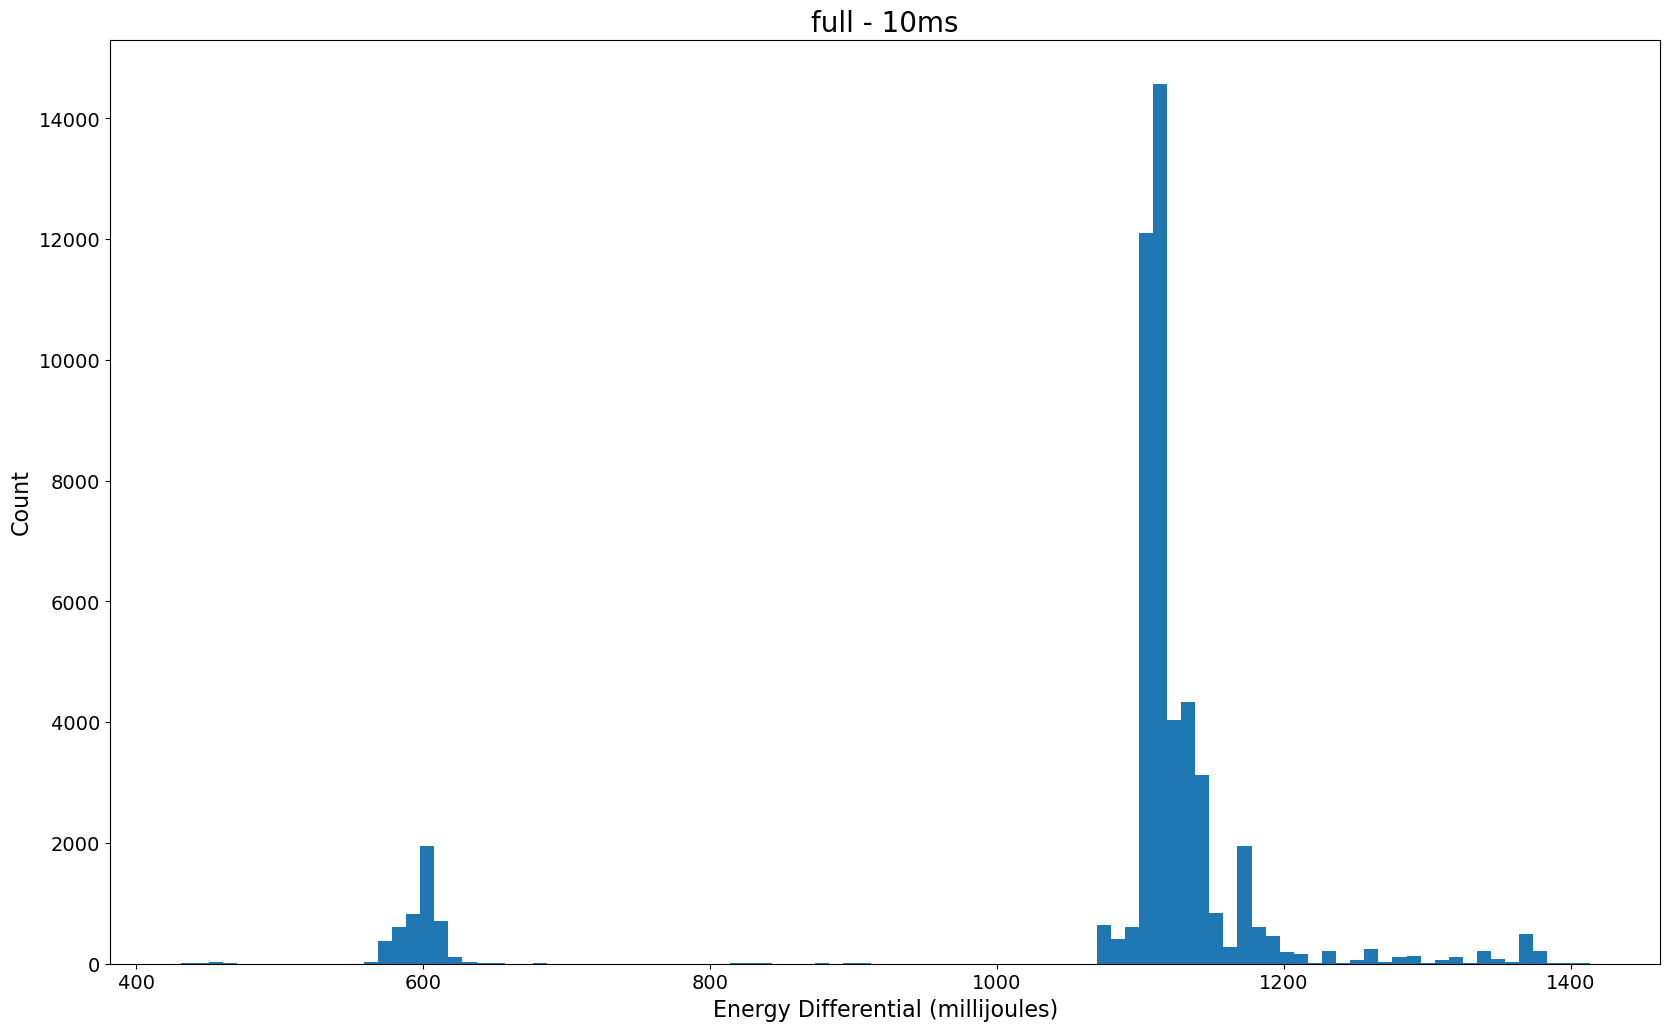

In [23]:
# Now do the same thing but with bin counts
for source in data:
    # Plot the data
    source[1].plot(x='time', y='diff', title=f'{source[0]} - 10ms', figsize=(20, 12), kind='hist', bins=100)
    plt.legend().set_visible(False)

    plt.xlabel('Energy Differential (millijoules)', fontsize=16)
    plt.ylabel('Count', fontsize=16)

    # Bigger fonts for the title and axis labels
    plt.title(f'{source[0]} - 10ms', fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Save the plot to results/<datasource>/dmesg_plot.png
    plt.savefig(Path('results', POLLING_TIMER, source[0], 'dmesg_plot_bins.png'))

    plt.show()